# ***Foward process***

In [2]:
import TO_sim.Q_simul as QSIM
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [3]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [4]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)
N = 2000
K = 5.7
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1500,start_p=True,seed=6)

sol = Qsimul.solve()

In [5]:
TLO_info = Qsimul.TLO(K_end=15)

In [53]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']
K_end = 6.1#TLO_info['cluster_info']['S+'].dropna().index[0]

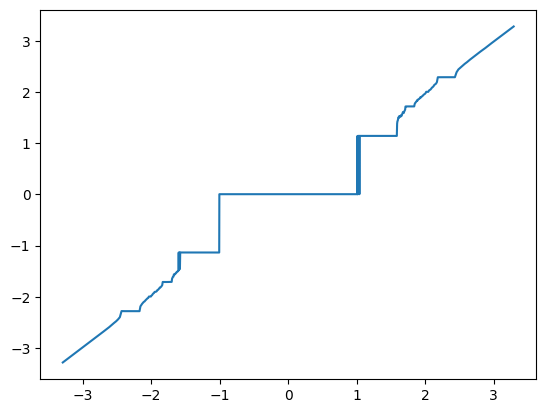

In [21]:
avg_dtheta = TLO_info['avg_dtheta'].iloc[61].to_numpy(float)
plt.plot(omega,avg_dtheta)


In [55]:
Ks = TLO_info['Theta_last'].index
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)

In [23]:
TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)

In [24]:
avg_dtheta = TLO_info['avg_dtheta'].iloc[iloc].to_numpy(float)
omega = Qsimul.omega

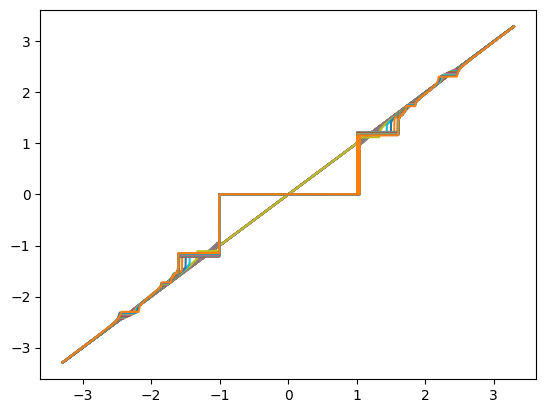

In [56]:

plt.plot(omega,TLO_back_info['avg_dtheta'].T);

In [28]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

***Foward***

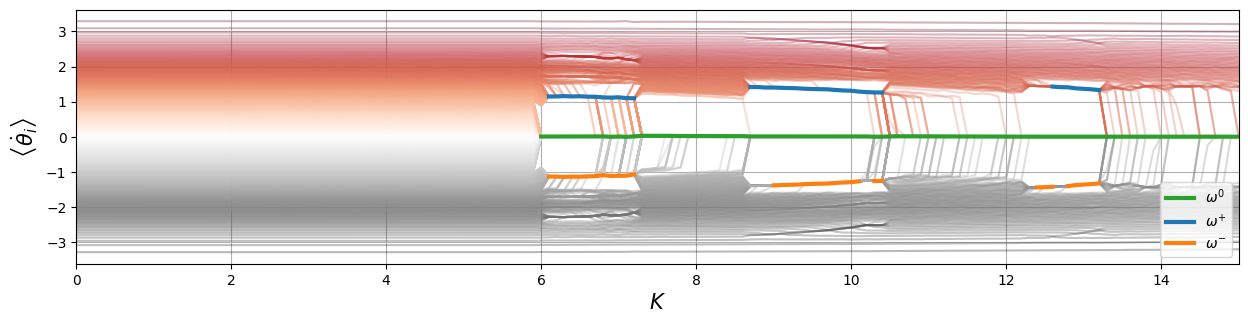

In [29]:
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\omega^{0}$')
plt.plot(TLO_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\omega^{+}$')
plt.plot(TLO_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
plt.xlim(0,15)
plt.xlabel('$K$',fontsize=15)
plt.show()

In [30]:
MAX_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_info['r_info']['r0'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(r0*Ks/m) - 0.3056*1/np.sqrt(Ks*r0*m**3)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)


rp = TLO_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks/m) - 0.3056*1/np.sqrt(Ks*rp*m**3)

rm = TLO_info['r_info']['r-'].to_numpy(float)
OPM = 4/np.pi * np.sqrt(rm*Ks/m) - 0.3056*1/np.sqrt(Ks*rm*m**3)

shift_P = Ks**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) + Ks**2 * rp * rp/(2*m*(1/m**2+(MAX_O0)**2)) 
shift_M = Ks**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) + Ks**2 * rm * rm/(2*m*(1/m**2+(MIN_O0)**2)) 

# F_Ss = []
# O_rp = []
# for O,shift,Krp in zip(MAX_O0,shift_P,Ks*rp):
#     F_S,F_OR = OSP2.get_shift(O)
#     S = F_S(Krp-shift)
#     O_rp.append(O+S)

In [31]:
r0A = F_R0u(Ks)
rmA = F_RMu(Ks)
OP0A = 4/np.pi * np.sqrt(rmA*Ks/m) - 0.3056*1/np.sqrt(Ks*rmA*m**3)

In [32]:
Ks = TLO_info['Theta_last'].index
K_end = 8
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)

In [33]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

In [34]:
O_RP = (OP0+shift_M)

In [35]:
df_Km = pd.read_excel('Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_m = df_Km.query(f'm == {m}').reset_index().set_index('K')
Ks = df_m['r+_ul'].index.to_numpy(float)
A_r2u = df_m['r+_ul'].to_numpy(float)
A_r2ut = df_m['r+_total_u'].to_numpy(float)
# plt.plot(Ks,A_r2u)

In [36]:
# A_r2ut
shift_PA = Ks**2 * r0 * A_r2ut/(2*m*(1/m**2+( OP0A)**2)) + Ks**2 * A_r2ut * A_r2ut/(2*m*(1/m**2+( OP0A)**2)) 
OPPA = 4/np.pi * np.sqrt(A_r2ut*Ks/m) - 0.3056*1/np.sqrt(Ks*A_r2ut*m**3)

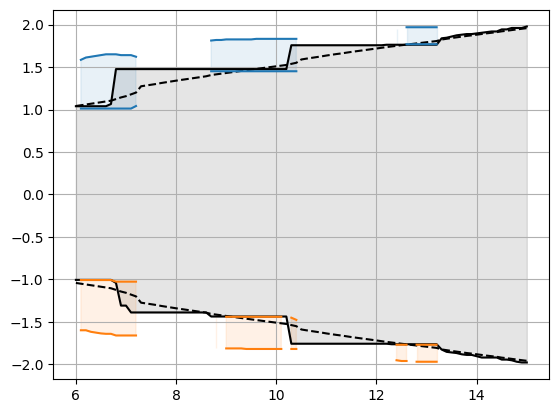

In [37]:


plt.plot(Ks, MAX_O0,color='black')
plt.plot(Ks, MIN_O0,color='black')
plt.fill_between(Ks,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks,OP0,color='black',linestyle='--')
plt.plot(Ks,-OP0,color='black',linestyle='--')


# plt.axvline(7.0)
# plt.axhline(0.94305192 +0.20474944664508665)

# plt.plot(Ks,OP0+shift_P+OPP,color='tab:blue',linestyle='--')
# plt.plot(Ks,OP0+shift_P,color='tab:blue',linestyle=':')
# plt.plot(Ks,OP0+shift_P-OPP,color='tab:blue',linestyle='--')

plt.plot(Ks, MAX_OP,color='tab:blue')
plt.plot(Ks, MIN_OP,color='tab:blue')
plt.fill_between(Ks,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
# 1.1659297694635238
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks, MAX_OM,color='tab:orange')
plt.plot(Ks, MIN_OM,color='tab:orange')
plt.fill_between(Ks,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)

# plt.plot(Ks,-(OP0+shift_P)+OPM,color='tab:orange',linestyle='--')
# plt.plot(Ks,-(OP0+shift_P),color='tab:orange',linestyle=':')
# plt.plot(Ks,-(OP0+shift_P)-OPM,color='tab:orange',linestyle='--')

# plt.plot(Ks,shift_PA+OP0A+OPPA)
# plt.plot(Ks,shift_PA+OP0A-OPPA)


# plt.plot(Ks,-(shift_PA+OP0A+OPPA))
# plt.plot(Ks,-(shift_PA+OP0A-OPPA))

plt.grid()
# plt.xlim(0,15)

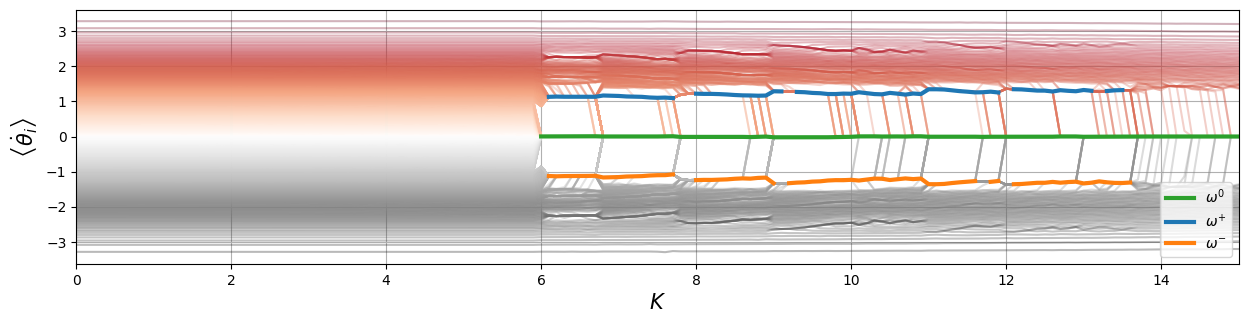

In [68]:
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\omega^{0}$')
plt.plot(TLO_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\omega^{+}$')
plt.plot(TLO_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
plt.xlim(0,15)
plt.xlabel('$K$',fontsize=15)
plt.show()

***Backward***

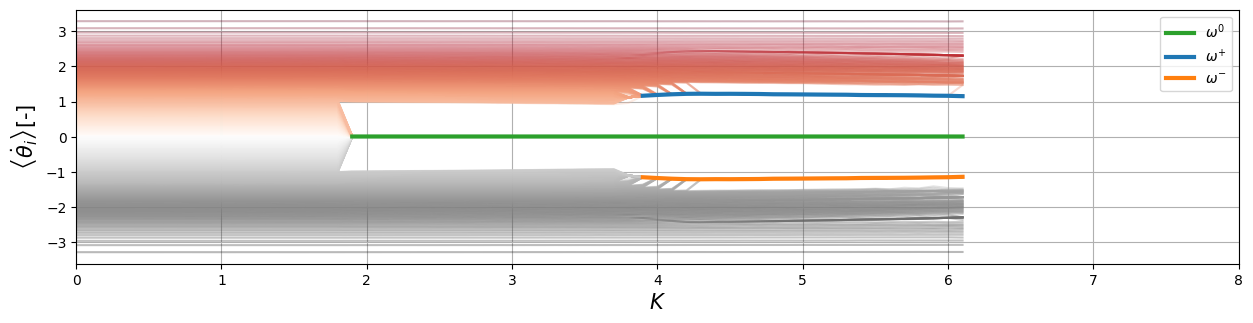

In [38]:
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_back_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_back_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\omega^{0}$')
plt.plot(TLO_back_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\omega^{+}$')
plt.plot(TLO_back_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$[-]',size=15)
plt.legend()
plt.grid()
plt.xlim(0,K_end)
plt.xlabel('$K$',fontsize=15)
plt.show()


In [437]:
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1000)

In [78]:
_,_,rs_d,rs_u,_,_= OSP2.get_r_sec_np(Ks,m,F_RMu,samples=30)

In [30]:
df_STEP = Qsimul.MAKE_STEP(TLO_info,s_length=3,P_dK=0.1)

In [463]:
df_STEP['rs_up'] = np.nan
df_STEP['rs_dp'] = np.nan

In [360]:
df_STEP.iloc[0]['rs_up']

nan

In [464]:
rs_dps = []
rs_ups = []

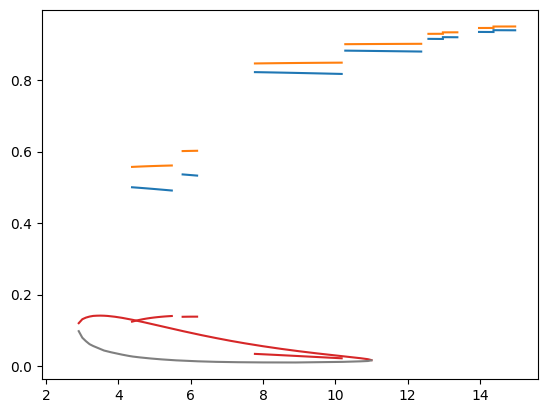

In [465]:
K_step_index = df_STEP.index
for K_step in K_step_index:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    _,_,rs_dp,rs_up,_,_= OSP2.get_r_sec_np(Ks_step,m,F_RMu_s,samples=30) 
    rs_dp = rs_d_s[0] + rs_dp -  rs_dp[0]
    rs_up = rs_u_s[0] + rs_up - rs_up[0]
    rs_dps.append(rs_dp)
    rs_ups.append(rs_up)
    df_STEP.loc[K_step]['rs_dps'] = rs_dp
    df_STEP.loc[K_step]['rs_ups'] = rs_up
    plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
    plt.plot(Ks_step,F_R0u_s(Ks_step),color='tab:orange')
    
    # plt.plot(Ks_step,rs_u_s,color='tab:red')
    # plt.plot(Ks_step,rs_d_s,color='tab:gray')

    plt.plot(Ks_step,rs_up,color='tab:red')
    plt.plot(Ks_step,rs_dp,color='tab:gray')

plt.plot(Ks,rs_u,color='tab:red')
plt.plot(Ks,rs_d,color='tab:gray')

In [467]:
df_STEP['rs_up'] = rs_ups
df_STEP['rs_dp'] = rs_dps

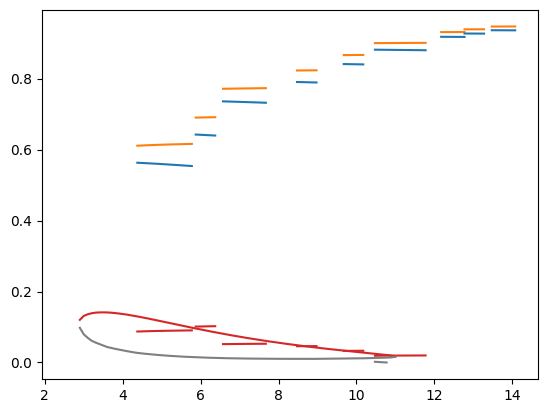

In [440]:
K_step_index = df_STEP.index
for K_step in K_step_index[:-1]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']

    plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
    plt.plot(Ks_step,F_R0u_s(Ks_step),color='tab:orange')
    plt.plot(Ks_step,rs_u_s,color='tab:red')
    plt.plot(Ks_step,rs_d_s,color='tab:gray')

plt.plot(Ks,rs_u,color='tab:red')
plt.plot(Ks,rs_d,color='tab:gray')

In [485]:
MAXuS = [] 
MAXdS = [] 
K_step_index = df_STEP.index

for K_step in K_step_index:
    MAXu = np.nanmax([df_STEP.loc[K_step]['rs_u'],df_STEP.loc[K_step]['rs_up']],axis=0)
    MAXuS.append(MAXu)

    MAXd = np.nanmax([df_STEP.loc[K_step]['rs_d'],df_STEP.loc[K_step]['rs_dp']],axis=0)
    MAXdS.append(MAXd)

In [486]:
df_STEP['rs_up'] = MAXuS
df_STEP['rs_dp'] = MAXdS

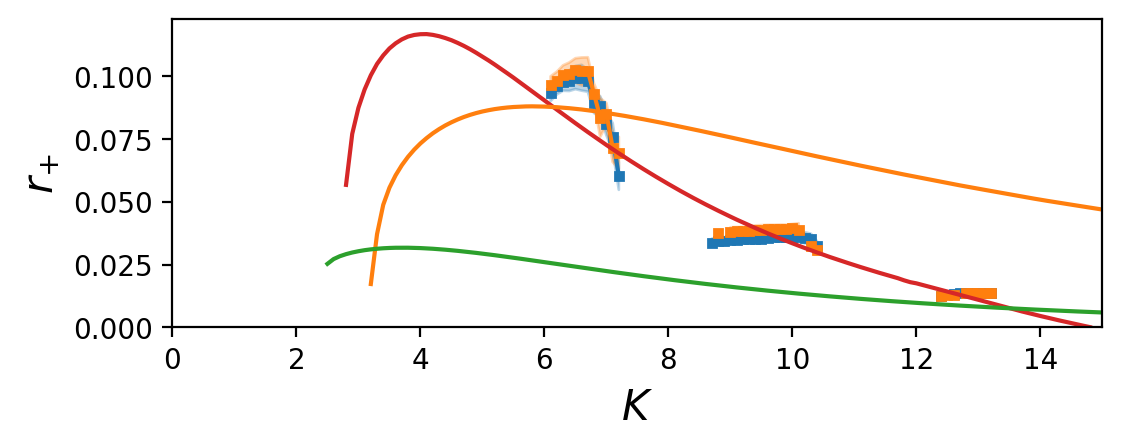

In [80]:
from matplotlib.legend_handler import HandlerLine2D,HandlerTuple
RS = r_info.columns[0:8]
fig = plt.figure(figsize=(6,2),dpi=200)
r_Pl,r_Ml=plt.plot(r_info[RS[2:4]],marker='s',markersize=3)
r_Plf =plt.fill_between(r_info['r+'].index,(r_info['r+']-r_info['sig+']).to_numpy(float),
                 (r_info['r+']+r_info['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)
r_Mlf =plt.fill_between(r_info['r-'].index,(r_info['r-']-r_info['sig-']).to_numpy(float),
                 (r_info['r-']+r_info['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)


# K_step_index = df_STEP.index
# for K_step in K_step_index[:]:
#     Ks_step = df_STEP.loc[K_step]['Ks_step']
#     F_RMu_s = df_STEP.loc[K_step]['F_RMu']
#     F_R0u_s = df_STEP.loc[K_step]['F_R0u']
#     rs_d_s = df_STEP.loc[K_step]['rs_d']
#     rs_u_s = df_STEP.loc[K_step]['rs_u']
#     S_start = df_STEP.loc[K_step]['S_start']
#     S_end = df_STEP.loc[K_step]['S_end']
#     S_sidx = np.searchsorted(Ks_step,S_start)
#     S_eidx = np.searchsorted(Ks_step,S_end)
    
    
#     plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
#     plt.axvline(S_end,color ='black',ls='--',alpha=0.3)
#     # s_ = plt.scatter(Ks_step[S_sidx],rs_u_s[S_sidx],color='tab:red',zorder=5,alpha=0.8,s=8)
#     # e_ = plt.scatter(Ks_step[S_eidx],rs_u_s[S_eidx],color='black',zorder=5,alpha=0.8,s=8)

#     # plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
#     A = (F_R0u_s(Ks_step[S_sidx])-F_RMu_s(Ks_step[S_sidx]))/2
#     # plt.plot(Ks_step,rs_u_s[S_sidx]-A+(F_R0u_s(Ks_step)-F_RMu_s(Ks_step))/2,color='tab:red')
#     # plt.plot(Ks_step,rs_u_s[S_sidx]-A+(F_R0u_s(Ks_step)-F_RMu_s(Ks_step))/2,color='tab:blue')
#     # l_, = plt.plot(Ks_step,rs_u_s,color='tab:red',zorder=4,alpha=0.8)

# step_a = (s_,l_,e_)

SU, = plt.plot(Ks,rs_u,color='tab:red')

SD, = plt.plot(Ks,rs_d,color='tab:gray')
r_dl, =plt.plot(Ks,(F_R0u(Ks)-F_RMu(Ks))/2)
# plt.legend([(r_Pl,r_Plf),(r_Ml,r_Mlf),SU,SD,r_dl,step_a],['$r_+$','$r_-$','$r_{+upper,anlytical}$','$r_{+lower,anlytical}$','$r_d/2$','$r_{+stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)},fontsize=8)
# plt.legend([(r_Pl,r_Plf),(r_Ml,r_Mlf),SU,r_dl],['$r_+$','$r_-$','$r_{+,anlytical}$','$r_{drift}/2$'],handler_map={step_a: HandlerTuple(ndivide=None)},fontsize=8)
plt.ylim(0)
plt.xlim(0,15)
plt.ylabel('$r_{+}$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.show()

Text(0, 0.5, '$r_0$')

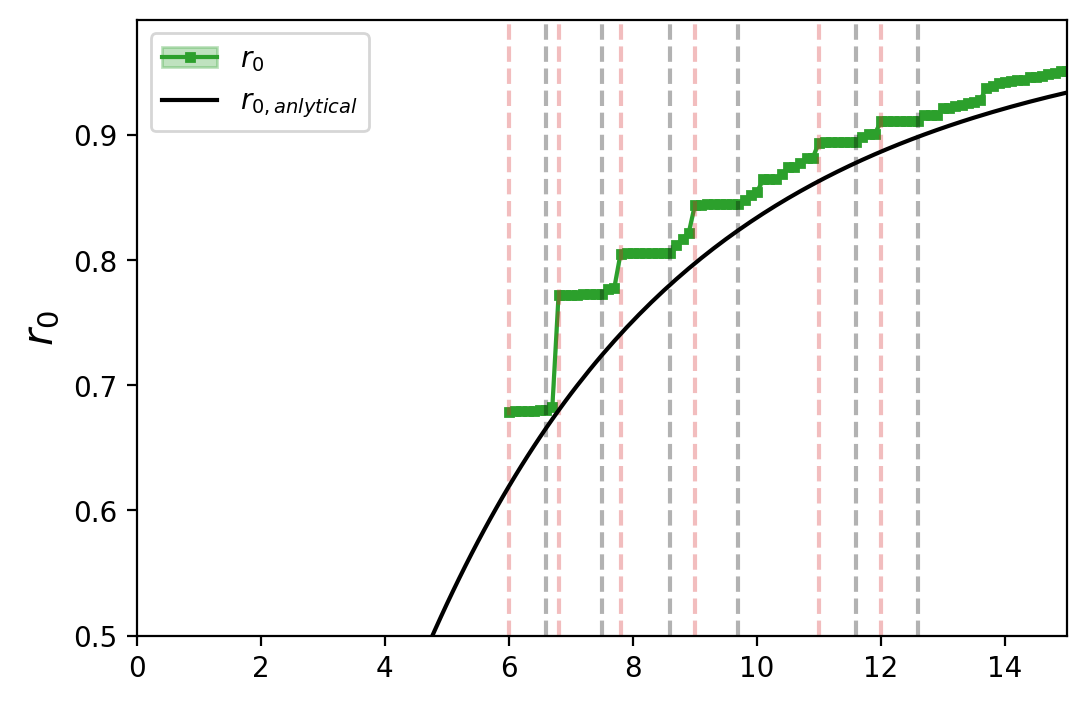

In [51]:
RS = r_info.columns[0:8]
fig = plt.figure(figsize=(6,4),dpi=200)
r_0l, = plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_0lf = plt.fill_between(r_info[RS[1]].index,(r_info[RS[1]]-r_info['sig0']).to_numpy(float),
                 (r_info[RS[1]]+r_info['sig0']).to_numpy(float),color='tab:green',alpha=0.3)


K_step_index = df_STEP.index
for K_step in K_step_index[:]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)
    
    # s_ =plt.scatter(Ks_step[S_sidx],F_R0u_s(Ks_step)[S_sidx],color='black')
    # l_, =plt.plot(Ks_step,F_R0u_s(Ks_step),color='black')
    plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
    plt.axvline(S_end,color ='black',ls='--',alpha=0.3)
# step_a = (s_,l_)
R0l, = plt.plot(Ks,F_RMu(Ks),color='black')
# plt.legend([(r_0l,r_0lf),R0l,step_a],['$r_0$','$r_{0,anlytical}$','$r_{0stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
# plt.legend([(r_0l,r_0lf),R0l,step_a],['$r_0$','$r_{0,anlytical}$','$r_{0stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
plt.legend([(r_0l,r_0lf),R0l],['$r_0$','$r_{0,anlytical}$','$r_{0stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})

# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.5)
plt.xlim(0,15)
plt.ylabel('$r_0$',fontsize=15)
# plt.xlabel('$K$',fontsize=15)

In [35]:
K_ = np.arange(0,15,0.01)

Text(0.5, 1.0, '$m = 6, N = 2000$')

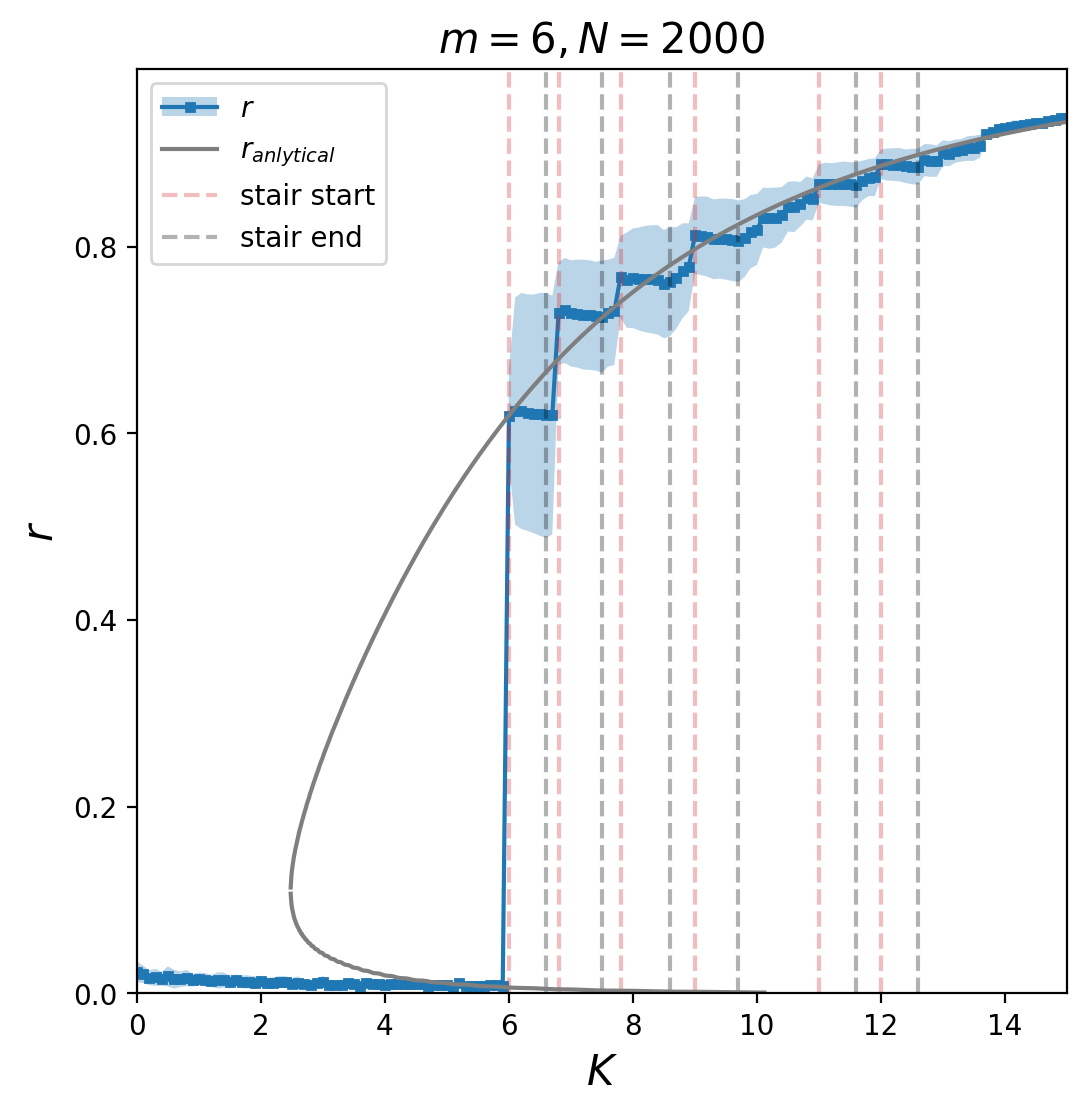

In [59]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info[RS[4]].index,(r_info[RS[0]]-r_info['sig_mean']).to_numpy(float),
                 (r_info[RS[0]]+r_info['sig_mean']).to_numpy(float),alpha=0.3)



K_step_index = df_STEP.index
for K_step in K_step_index[:]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)
    
    S=plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3,label='stair start')
    E=plt.axvline(S_end,color ='black',ls='--',alpha=0.3,label='stair end')
    # s_ =plt.scatter(Ks_step[S_sidx],F_RMu_s(Ks_step)[S_sidx],color='tab:grey')
    # l_,=plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:grey')
plt.plot(np.nan,np.nan,color='tab:blue',label ='$r$',marker='s',markersize=3)
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
step_a = (s_,l_)
RMl, = plt.plot(K_,F_RMu(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
# plt.legend([(r_Ml,r_Mlf),RMl],['$r$','$r_{anlytical}$','$r_{stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
plt.legend([(r_Ml,r_Mlf),RMl,S,E],['$r$','$r_{anlytical}$','stair start','stair end'],handler_map={step_a: HandlerTuple(ndivide=None)})
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# R_STD = OSP.get_rstd(F_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,15)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

## ***BACK WARD***

In [48]:
iloc

80

In [58]:
r_info_back['r0'].iloc[iloc]

0.6826136141393652

In [59]:
K_ = np.linspace(0,30,10000)
get_K = interpolate.interp1d(F_R0u(K_),K_,kind='linear',bounds_error=False)

In [60]:
r0 = r_info_back['r0'].iloc[iloc]
K_match = get_K(r0)
OPM = OSP2.get_OPM(F_RMu(K_match),K_match,m)
K_match,OPM

(array(6.15193857), 1.0141479047350703)

In [65]:
Ks_ = TLO_back_info['Theta_last'].index
# K_end = 7
iloc = np.searchsorted(Ks_,K_end)
Theta_last = TLO_back_info['Theta_last'].iloc[iloc].to_numpy(float)
# O_0 = norm.ppf(r_0/2+0.5)
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,OPM)

In [66]:
rp = r_info_back['r+'].iloc[iloc]
rm = r_info_back['r-'].iloc[iloc]
O_P2P = 4/np.pi * np.sqrt(rp*K/m) - 0.3056*1/np.sqrt(K*rp*m**3)
shift_OP = (K**2*r0*rp)/(2*m*(1/m**2+(OPM)**2)) - (K**2*rp*rp)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))
O_2OP = OPM+ shift_OP + O_P2P

O_P2M = 4/np.pi * np.sqrt(rm*K/m) - 0.3056*1/np.sqrt(K*rm*m**3)
shift_OM = (K**2*r0*rm)/(2*m*(1/m**2+(OPM)**2)) - (K**2*rm*rm)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))
O_2OM = OPM+ shift_OP + O_P2M

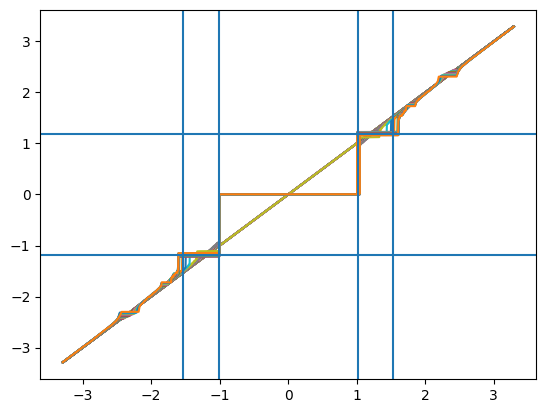

In [70]:
plt.plot(Qsimul.omega,TLO_back_info['avg_dtheta'].T)
plt.axhline(OPM+shift_OP)
plt.axhline(-(OPM+shift_OM))
plt.axvline(O_2OP)
plt.axvline(OPM)

plt.axvline(-OPM)
plt.axvline(-O_2OM)

In [77]:
_,_,rs_db,rs_ub,_,_= OSP2.get_r_sec_np(Ks,m,F0_RMu,samples=30)

In [ ]:
plt.plot(Ks,rs_u)
plt.plot(Ks,rs_ub)


In [71]:
K_t = np.linspace(0,15,30000)

In [74]:
F_S,F_OR = OSP2.get_shift(OPM)
d,u,rs_d0,rs_uM= OSP2.get_r_sec0_np(Ks_back,m,OPM,O_2OM,F_R0u,F_S,F_OR,samples=40)
d,u,rs_d0,rs_uP= OSP2.get_r_sec0_np(Ks_back,m,OPM,O_2OP,F_R0u,F_S,F_OR,samples=40)

Text(0.5, 0, '$K$')

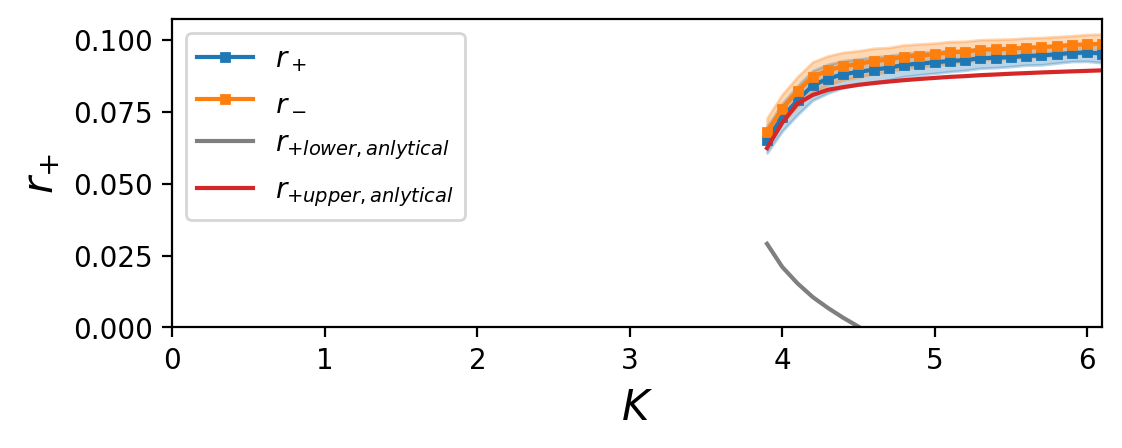

In [75]:
RS = r_info_back.columns[0:8]
fig = plt.figure(figsize=(6,2),dpi=200)
# plt.plot(r_info_back[RS[2:4]],marker='s',markersize=3)
plt.plot(r_info_back[RS[2:4]],marker='s',markersize=3)
# plt.plot(r_info_back[['r+_total','r-_total']],marker='s',markersize=3)
plt.fill_between(r_info_back['r+'].index,(r_info_back['r+']-r_info_back['sig+']).to_numpy(float),
                 (r_info_back['r+']+r_info_back['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)

plt.fill_between(r_info_back['r-'].index,(r_info_back['r-']-r_info_back['sig-']).to_numpy(float),
                 (r_info_back['r-']+r_info_back['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)

plt.plot(np.nan,np.nan,color='tab:blue',label ='$r_+$',marker='s',markersize=3)
plt.plot(np.nan,np.nan,color='tab:orange',label ='$r_-$',marker='s',markersize=3)
sd_ = plt.plot(np.nan,np.nan,color='tab:grey',label ='$r_{+lower,anlytical}$')
su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r_{+upper,anlytical}$')
# l_ = plt.scatter(np.nan,np.nan,color='tab:red',label ='$r_{-step}$')
plt.plot(Ks_back,rs_uM,color='tab:red')
plt.plot(Ks_back,rs_d0,color='tab:gray')
plt.legend()

plt.ylim(0)
plt.xlim(0,K_end)
plt.ylabel('$r_{+}$',fontsize=15)
plt.xlabel('$K$',fontsize=15)

Text(0, 0.5, '$r_0$[-]')

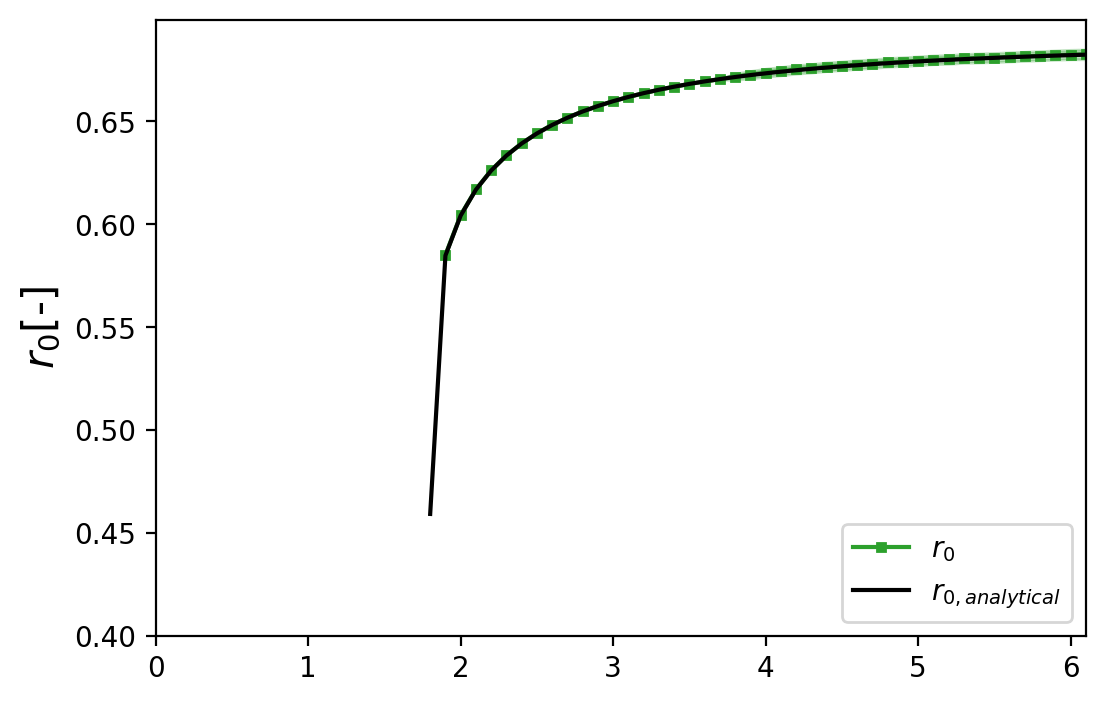

In [72]:
RS = r_info_back.columns[0:8]
fig = plt.figure(figsize=(6,4),dpi=200)
plt.plot(r_info_back[RS[1]],color='tab:green',marker='s',markersize=3)
plt.fill_between(r_info_back[RS[1]].index,(r_info_back[RS[1]]-r_info_back['sig0']).to_numpy(float),
                 (r_info_back[RS[1]]+r_info_back['sig0']).to_numpy(float),color='tab:green',alpha=0.3)

plt.plot(np.nan,np.nan,color='tab:green',label ='$r_0$',marker='s',markersize=3)
sd_ = plt.plot(np.nan,np.nan,color='black',label ='$r_{0,analytical}$')
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
# l_ = plt.scatter(np.nan,np.nan,color='black',label ='$r_{0,step}$')
plt.legend(loc=4)
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F0_RMu(Ks),color='black')
plt.plot(Ks,F0_R0u(Ks),color='black')
plt.ylim(0.4)

plt.xlim(0,K_end)
plt.ylabel('$r_0$[-]',fontsize=15)
# plt.xlabel('$K$',fontsize=15)

Text(0.5, 1.0, '$m = 6, N = 2000$')

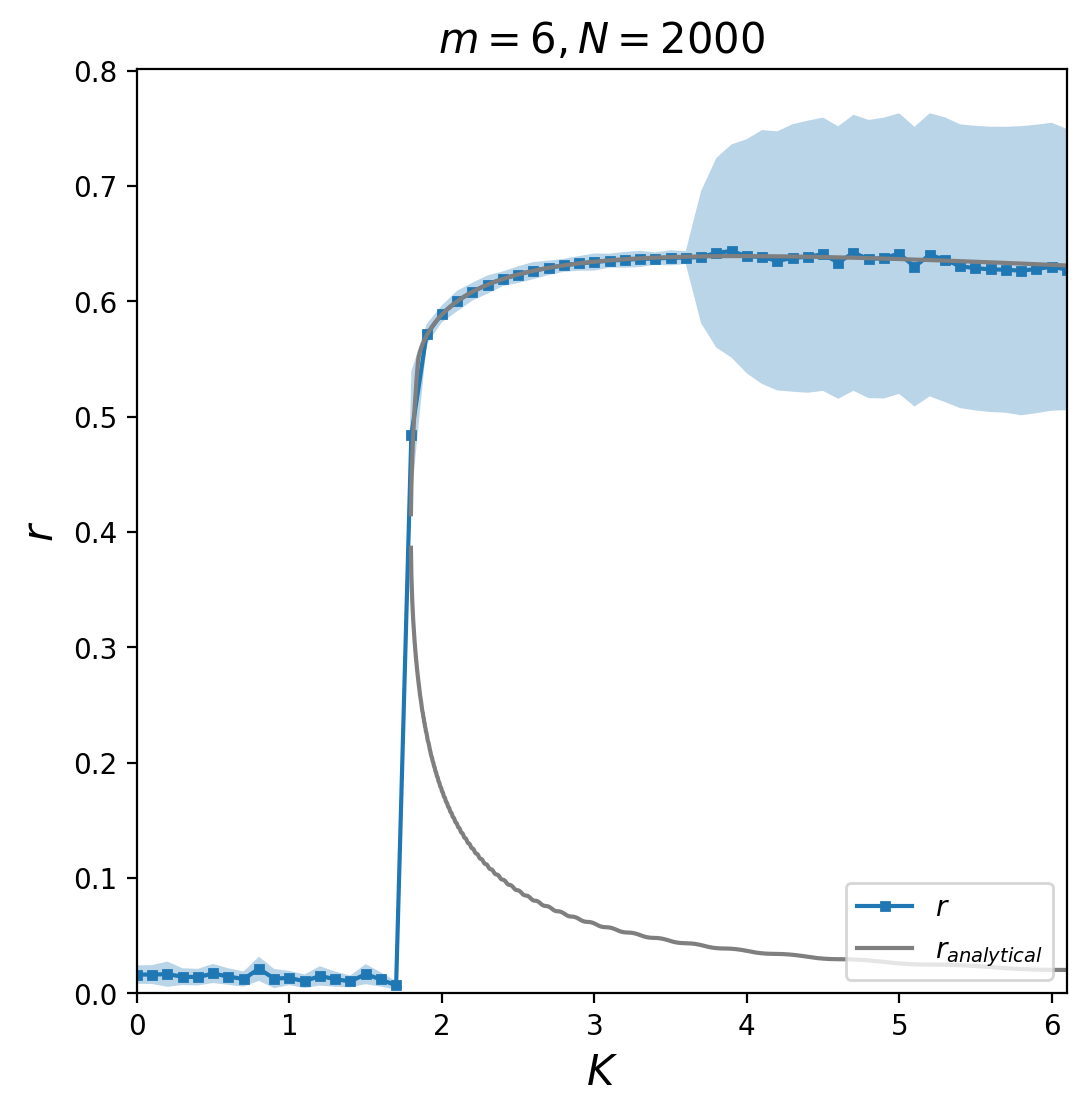

In [73]:
RS = r_info_back.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info_back[RS[1]],color='tab:green',marker='s',markersize=3)
plt.plot(r_info_back[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info_back[RS[2]],color='tab:green',marker='s',markersize=3)
plt.fill_between(r_info_back['sig_mean'].index,(r_info_back[RS[0]]-r_info_back['sig_mean']).to_numpy(float),
                 (r_info_back[RS[0]]+r_info_back['sig_mean']).to_numpy(float),alpha=0.3)



plt.plot(np.nan,np.nan,color='tab:blue',label ='$r$',marker='s',markersize=3)
sd_ = plt.plot(np.nan,np.nan,color='tab:grey',label ='$r_{analytical}$')
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
# l_ = plt.scatter(np.nan,np.nan,color='tab:grey',label ='$r_{step}$')
plt.legend(loc=4)
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
plt.plot(K_,F0_RMu(K_),color='tab:grey')
plt.plot(K_,F0_RMd(K_),color='tab:grey')
# R_STD = OSP2.get_rstd(F0_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,K_end)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

## FINITE SIZE EFFECT

In [1]:
import TO_sim.analytical.order_sec_parameter as OSP

In [2]:
ms = np.arange(3,7,0.1)
K = 5
rs_D = []
rs_2 = []
for m in ms:
    F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,K_max=5.1)
    _,_,rs_d,rs_u,_,_= OSP2.get_r_sec_np(5,m,F_RMu,samples=30) 
    rs_D.append((F_R0u(5)-F_RMu(5))/2)
    rs_2.append(rs_u)
# N = 500
# K = 5.7
# Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=3000,start_p=True,seed=6)

# sol = Qsimul.solve()

NameError: name 'np' is not defined

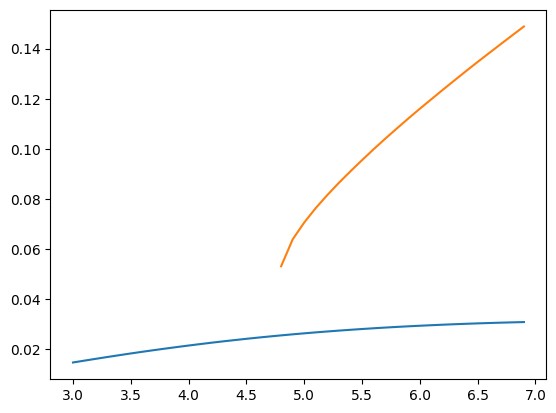

In [507]:
plt.plot(ms,rs_D)
plt.plot(ms,rs_2)

In [582]:
print(*A.keys())

ms S0 SP SM R0 RM0 RP RPT RM RMT SIG V0 VP VM SIGP SIGM


In [5]:
Ns = 500,1000,2000,3000
K = 5

# A = np.load(f'./Ensembles/wo_pvel/N = {N} K = {K}.npz')
RP_ms = {}
RP_stds = {}

RM_ms = {}
RM_stds = {}
STD_ms = {}
STD_stds = {}
for N in Ns:
    A = np.load(f'./Ensembles/N = {N} K = {K}.npz')
    SIG = A['SIG']
    RP = A['RP']
    RM = A['RM']
    R0 = A['R0']
    R0 = A['R0']

    # STD_ms[N] = np.nanmean(np.where(RM>0.2,SIG,np.nan),axis=1)
    # STD_stds[N] = np.nanstd(np.where(RM>0.2,SIG,np.nan),axis=1)
    STD_ms[N] = np.nanmean(SIG,axis=1)
    STD_stds[N] = np.nanstd(SIG,axis=1)
    RP_ms[N] = np.nanmean(RP,axis=1)
    RP_stds[N] = np.nanstd(RP,axis=1)
    RM_ms[N] = np.nanmean(RM,axis=1)
    RM_stds[N] = np.nanstd(RM,axis=1)

In [29]:
SIG.shape
# np.where(RM>0.2,SIG,np.nan)

(151, 48)

In [10]:
df_Km = pd.read_excel('NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_K = df_Km.query('K == 5').reset_index().set_index('m')

KeyError: 'r+_'

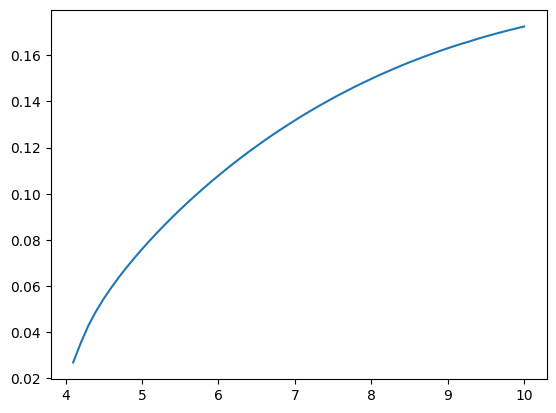

In [11]:
plt.plot(df_K.index,df_K['r+_ul'])
plt.plot(df_K.index,df_K['r+_'])

In [8]:
ms = np.arange(0,15.05,0.1)


In [49]:
df_K.index.to_numpy(float)[df_K['r+_ul'].isna()]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ])

m
0.0      True
0.1      True
0.2      True
0.3      True
0.4      True
        ...  
9.6     False
9.7     False
9.8     False
9.9     False
10.0    False
Name: r+_ul, Length: 101, dtype: bool

In [15]:
df_K

,K,rM_u,rM_d,r0_u,r0_d,rd_u,rd_d,r+_ul,r+_drift,mu,r+_total_u,r+_total_d,r+_total_ul,r+_total_ud
m,,,,,,,,,,,,,,
0.0,5.0,0.978364,0.978364,0.978364,0.978364,0.000000e+00,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
0.1,5.0,0.978364,NaN,0.978364,NaN,1.942163e-07,NaN,NaN,9.710814e-08,NaN,NaN,NaN,NaN,NaN
0.2,5.0,0.978363,NaN,0.978364,NaN,4.978953e-07,NaN,NaN,2.489476e-07,NaN,NaN,NaN,NaN,NaN
0.3,5.0,0.978353,NaN,0.978358,NaN,4.422220e-06,NaN,NaN,2.211110e-06,NaN,NaN,NaN,NaN,NaN
0.4,5.0,0.978287,NaN,0.978312,NaN,2.462596e-05,NaN,NaN,1.231298e-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,5.0,0.326103,0.008668,0.388155,0.026659,6.205216e-02,0.017992,0.169076,3.102608e-02,-0.115924,0.169076,NaN,NaN,NaN
9.7,5.0,0.322340,0.008615,0.384265,0.026479,6.192524e-02,0.017865,0.169962,3.096262e-02,-0.113991,0.169962,NaN,NaN,NaN
9.8,5.0,0.318584,0.008545,0.380375,0.026271,6.179046e-02,0.017725,0.170839,3.089523e-02,-0.112077,0.170839,NaN,NaN,NaN


Text(0, 0.5, '$r_{+}$')

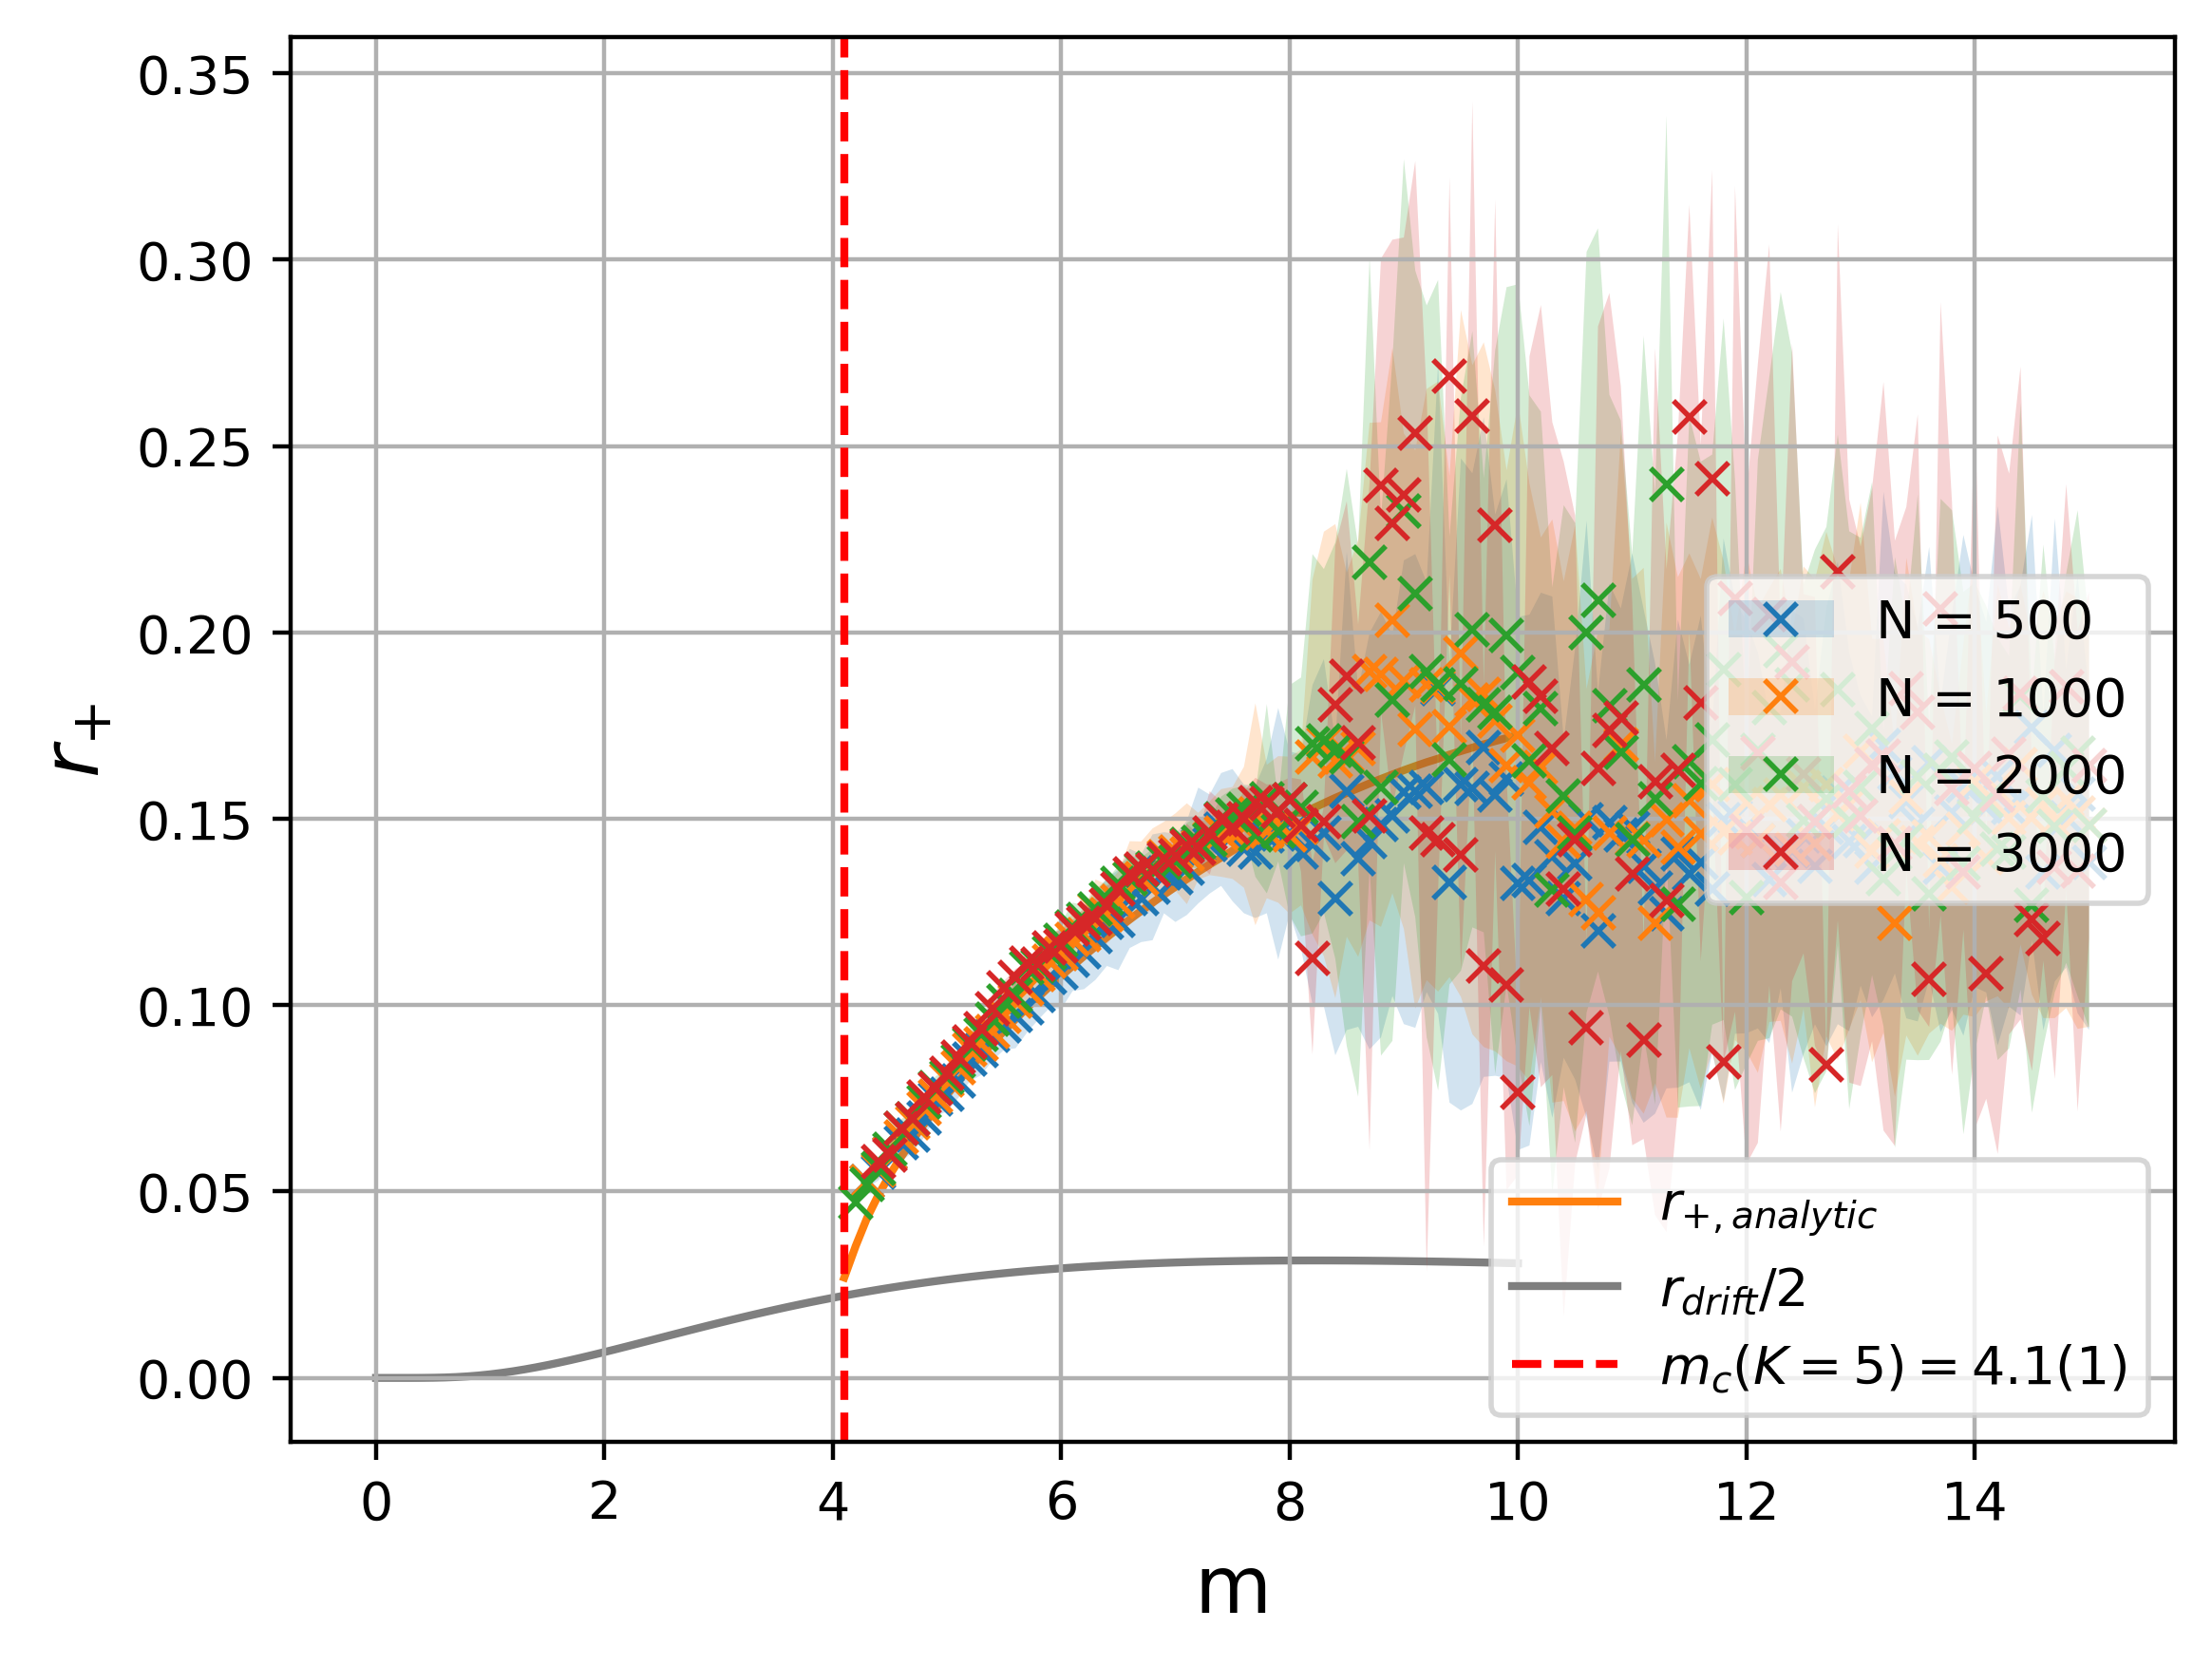

In [20]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
plt.figure(dpi=400)
lines = []
labels = []
for N in Ns:
    RP_m = RP_ms[N]
    RP_std = RP_stds[N]
    lp,= plt.plot(ms,RP_m,'x')
    lfp =plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.2)
    label = f'N = {N}'
    lines.append((lp,lfp))
    labels.append(label)


# Pls=plt.plot(ms,RPT,'.',color='tab:blue',alpha=0.1,markersize=3)
# Mls=plt.plot(ms,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend(lines,labels,loc=5)
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,analytic}$',zorder=0)
# # plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
plt.axvline(4.1,ls='--',label=r'$m_c(K=5)=4.1(1)$',color='red')
ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['rM_u'].to_numpy(float),df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=4)
# plt.xlim(3.5,7.5)
# plt.ylim(0.0,0.15)
plt.grid()
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
# plt.title(f'K={K} N = {N}')
plt.xlabel(f'm',size=15)
plt.ylabel(r'$r_{+}$',size=15)
# plt.title(r'ensemble = 50',fontsize=15)

# plt.legend()

In [7]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
lines = []
labels = []
for N in Ns:
    STD_m = STD_ms[N]
    STD_std = STD_stds[N]
    lp,= plt.plot(ms,STD_m,'x')
    lfp =plt.fill_between(ms,STD_m-STD_std,STD_m + STD_std,alpha=0.2)
    label = f'N = {N}'
    lines.append((lp,lfp))
    labels.append(label)


# Pls=plt.plot(ms,RPT,'.',color='tab:blue',alpha=0.1,markersize=3)
# Mls=plt.plot(ms,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend(lines,labels,loc='center left')
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# # plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
# plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)

ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=2)
# plt.xlim(3.5,7)
# plt.ylim(0.0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
# plt.title(f'K={K} N = {N}')
plt.xlabel(f'm[-]',size=15)
plt.ylabel(f'$r_+$[-]',size=15)

plt.legend()

NameError: name 'ms' is not defined